# フィルタリング

In [1]:
from scipy import ndimage
from scipy import signal
from scipy.misc import derivative


import skimage
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.filters import gaussian, gabor_kernel, sobel, sobel_h, sobel_v, prewitt, prewitt_h, prewitt_v, roberts, median
from skimage.io import imread, imsave
from skimage.restoration import denoise_bilateral, denoise_nl_means
from skimage.transform import rotate, resize
from skimage.morphology import square


import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow
import matplotlib.mlab as mlab
import matplotlib.colors as colors

import numpy as np
from numpy.fft import fft

import wave

from time import time


import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, RadioButtons

from tqdm.notebook import tqdm

<Figure size 432x288 with 0 Axes>

## 平均値フィルタ

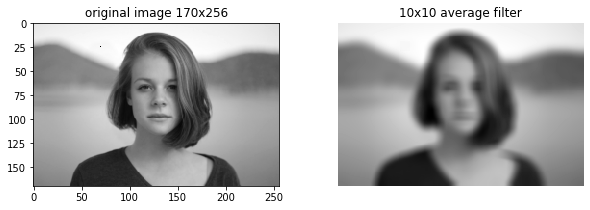

In [3]:
im = rgb2gray(imread('girl.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

im[25, 70] = 0

vals = (val_start, val_end, val_step) = 1, 21, 2

val_default = 10

@interact(N=vals)
def g(N=val_default):
    
    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_subplot(1, 2, 1)
    imshow(im)
#     plt.axis('off')
    plt.title('original image {0}x{1}'.format(im.shape[0], im.shape[1]))

    ax = fig.add_subplot(1, 2, 2)
    w = np.ones((N, N)) / (N ** 2)  # N×N平滑化フィルタ
    imshow(ndimage.convolve(im, w))
    plt.axis('off')
    plt.title('{0}x{0} average filter'.format(N))
    
    plt.show()

## ガウスフィルター

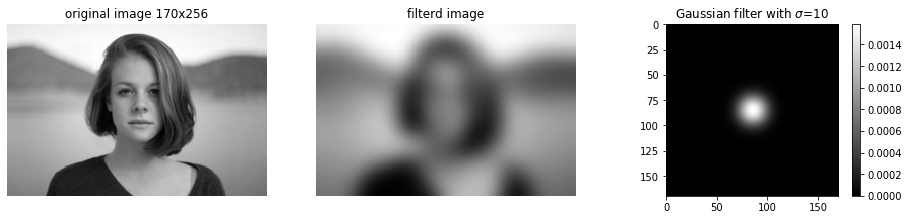

In [5]:
im = rgb2gray(imread('girl.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

size = min(im.shape[0], im.shape[1])
impuse_response = np.zeros((size, size))
impuse_response[size//2, size//2] = 1


vals = (val_start, val_end, val_step) = 1, 20, 1
val_default = 10

@interact(sigma=vals)
def g(sigma=val_default):
    
    fig = plt.figure(figsize=(13, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image {0}x{1}'.format(im.shape[0], im.shape[1]))

    ax = fig.add_subplot(1, 3, 2)
    imshow(gaussian(im, sigma=sigma))
    plt.axis('off')
    plt.title('filterd image')

    ax = fig.add_subplot(1, 3, 3)
    imshow(gaussian(impuse_response, sigma=sigma))
    plt.colorbar()
    plt.tight_layout()
    plt.title('Gaussian filter with $\sigma$={}'.format(sigma))
    
    plt.show()

## ガボールフィルタ

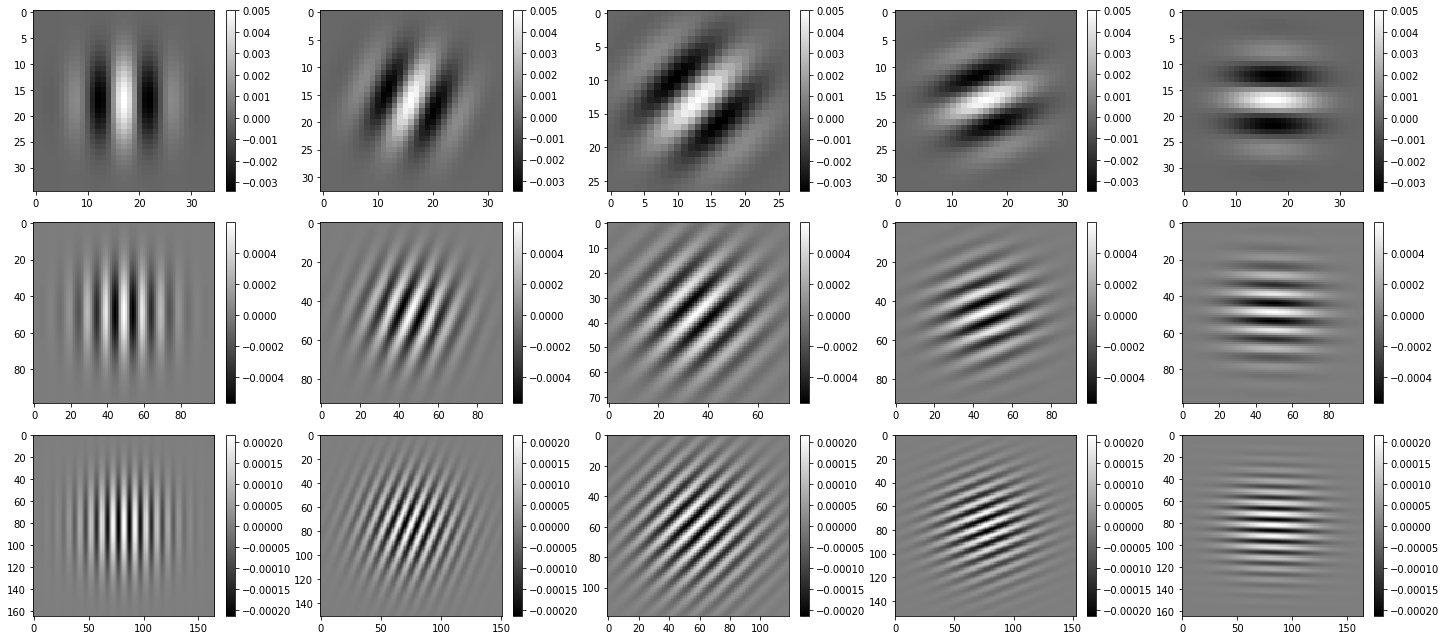

In [6]:
fig = plt.figure(figsize=(20,9))

for j in tqdm(range(3)):
    for i in tqdm(range(5), leave=False):
        ax = fig.add_subplot(3, 5, i+1 + j*5)
        imshow(gabor_kernel(frequency=0.1, bandwidth=1/(2*j+1), theta=0.4 * i).real, cmap="gray")
        plt.tight_layout()
        plt.colorbar()
plt.show()

[]

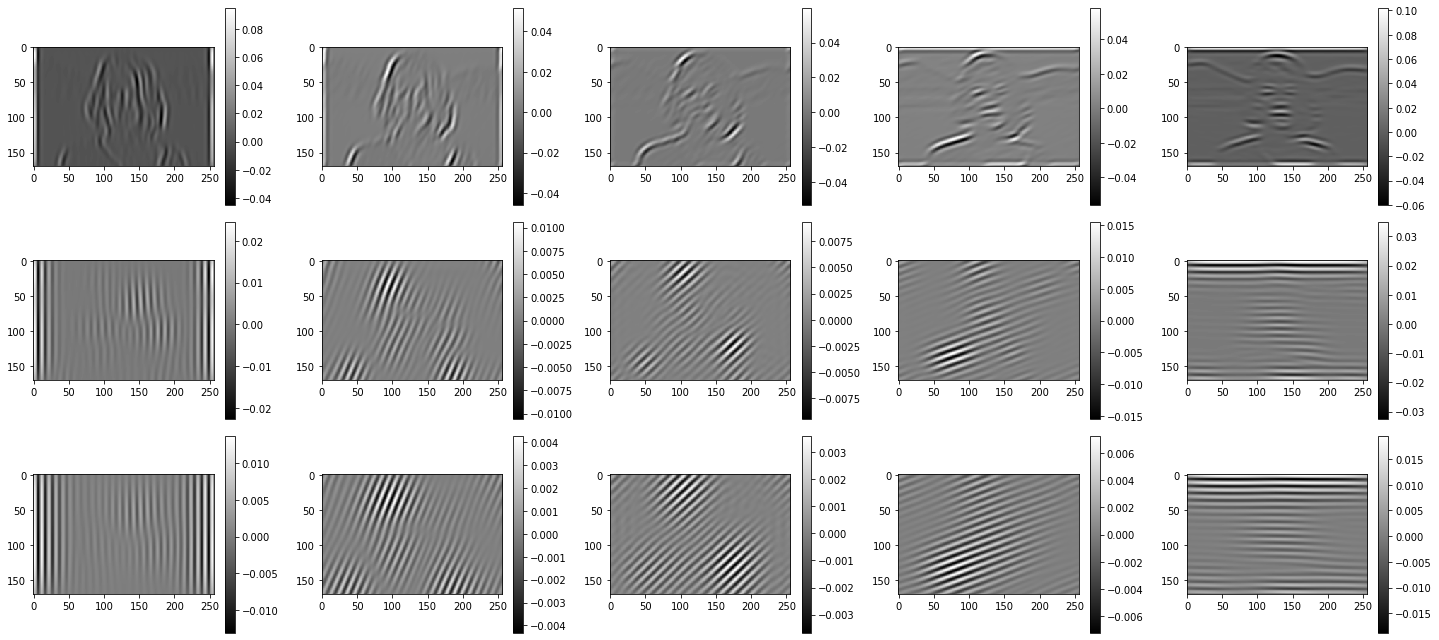

In [7]:
im = rgb2gray(imread('girl.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

fig = plt.figure(figsize=(20,9))

for j in tqdm(range(3)):
    for i in tqdm(range(5), leave=False):
        ax = fig.add_subplot(3, 5, i+1 + j*5)
        gabor = gabor_kernel(frequency=0.1, bandwidth=1/(2*j+1), theta=0.4 * i).real
        im_gabor = signal.fftconvolve(im, gabor, mode='same') # use FFT for convolution
        imshow(im_gabor, cmap="gray")
        plt.tight_layout()
        plt.colorbar()
plt.plot()

# 微分フィルタ

## ソーベルフィルタ、プレウィットフィルタ

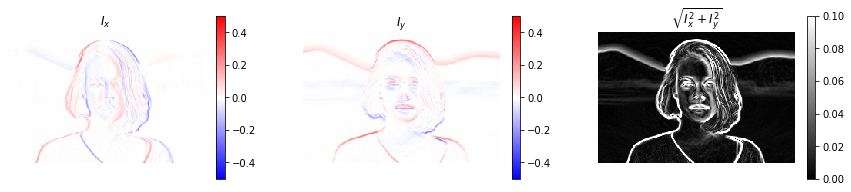

diff filter


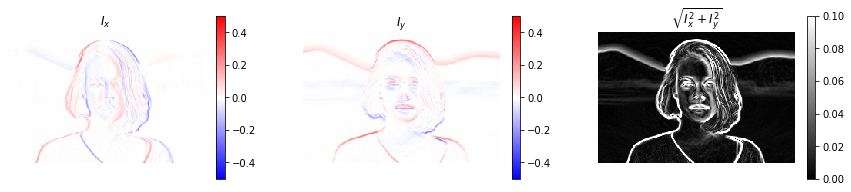


Sobel filter


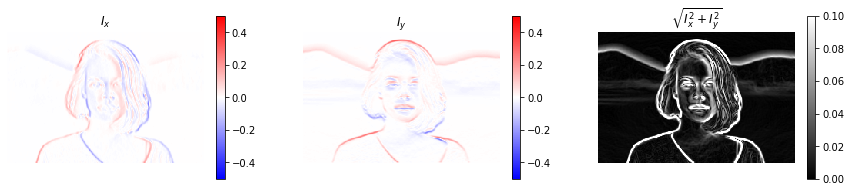


prewitt filter


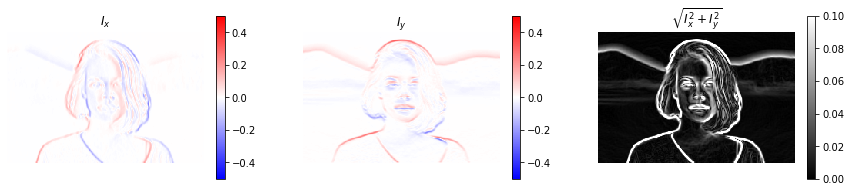


diff filter


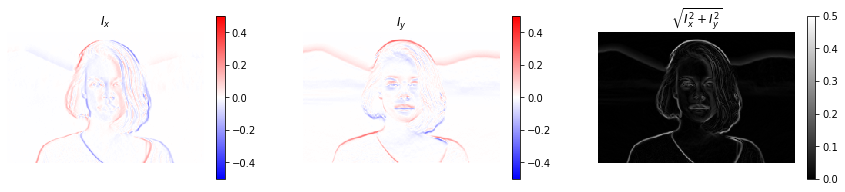


Sobel filter


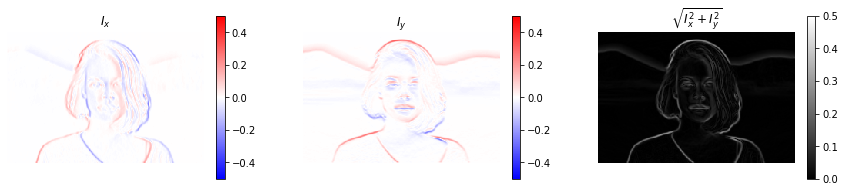


prewitt filter


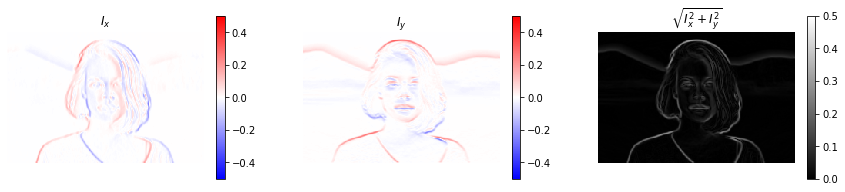

In [13]:
im = rgb2gray(imread('girl.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

kernels = {'diff': np.array([[ 0,0,0],
                             [-1,0,1],
                             [ 0,0,0]]) / 2,
           'prewitt': np.array([[-1,0,1],
                                [-1,0,1],
                                [-1,0,1]]) / 6,
           'sobel': np.array([[-1,0,1],
                              [-2,0,2],
                              [-1,0,1]]) / 8
          }

@interact(kernel=['diff', 'prewitt', 'sobel'],
          val_max=(0.1, 0.5, 0.1))

def g(kernel='diff', val_max=0.1):

    k = kernels[kernel]

    imh = ndimage.convolve(im, k)
    imv = ndimage.convolve(im, k.T)

    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(imh, cmap="bwr", vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.title('$I_x$')

    ax = fig.add_subplot(1, 3, 2)
    imshow(imv, cmap="bwr", vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.title('$I_y$')

    ax = fig.add_subplot(1, 3, 3)
    imshow(np.sqrt(imv**2 + imh**2), cmap="gray", vmin=0, vmax=val_max)
    plt.axis('off')
    plt.colorbar()
    plt.title('$\sqrt{I_x^2 + I_y^2}$')

    plt.show()
    
print('diff filter')
g(kernel='diff', val_max=0.1)
print()

print('Sobel filter')
g(kernel='sobel', val_max=0.1)
print()

print('prewitt filter')
g(kernel='prewitt', val_max=0.1)
print()

print('diff filter')
g(kernel='diff', val_max=0.5)
print()

print('Sobel filter')
g(kernel='sobel', val_max=0.5)
print()

print('prewitt filter')
g(kernel='prewitt', val_max=0.5)

## ソーベル，プレウィット，ロバーツ

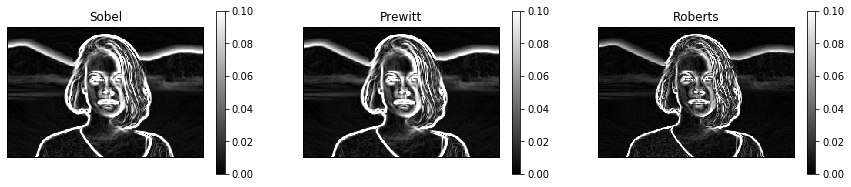

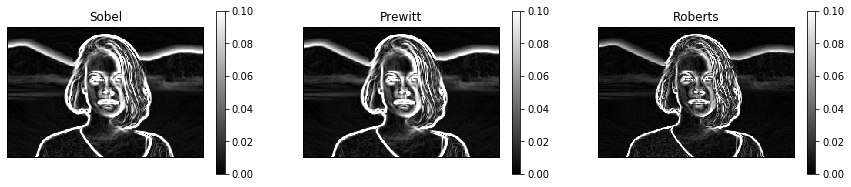

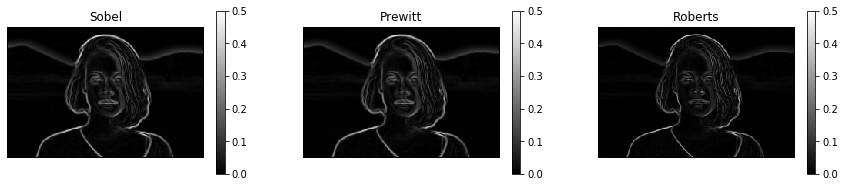

In [19]:
im = rgb2gray(imread('girl.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

@interact(val_max=(0.1, 0.5, 0.1))
def g(val_max=0.1):

    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(sobel(im), vmin=0, vmax=val_max)
    plt.axis('off')
    plt.colorbar()
    plt.title('Sobel')

    ax = fig.add_subplot(1, 3, 2)
    imshow(prewitt(im), vmin=0, vmax=val_max)
    plt.axis('off')
    plt.colorbar()
    plt.title('Prewitt')

    ax = fig.add_subplot(1, 3, 3)
    imshow(roberts(im), vmin=0, vmax=val_max)
    plt.axis('off')
    plt.colorbar()
    plt.title('Roberts')

    plt.show()
    
g()
print()
g(0.5)

## ラプラシアンフィルタ

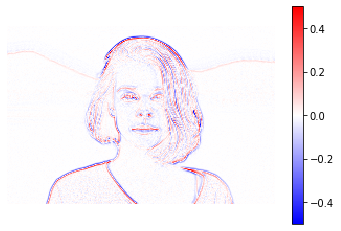

In [20]:
im = rgb2gray(imread('girl.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

L4 = np.array([[0, 1, 0],
               [1,-4, 1],
               [0, 1, 0]])

imshow(ndimage.convolve(im, L4), cmap="bwr", vmin=-0.5, vmax=0.5)
plt.axis('off')
plt.colorbar()

plt.show()

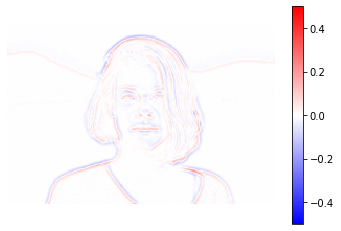

In [17]:
imshow(ndimage.convolve(gaussian(im, sigma=1), L4), cmap="bwr", vmin=-0.5, vmax=0.5)
plt.axis('off')
plt.colorbar()

plt.show()

## Laplacian of Gaussian （LoG）とゼロ交差

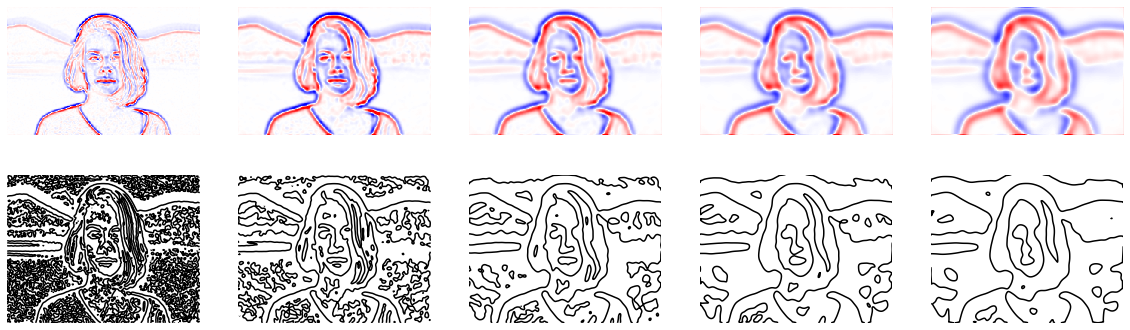

In [18]:
fig = plt.figure(figsize=(20,6))

for i in range(5):

    ax = fig.add_subplot(2, 5, i+1)
    iml = ndimage.convolve(gaussian(im, sigma=i+1), L4)
    m = np.abs(iml).max() / 2
    imshow(iml, cmap="bwr", vmin=-m, vmax=m) 
    plt.axis('off')

    ax = fig.add_subplot(2, 5, i+1 + 5)
    plt.contour(iml, levels=[0])
    plt.gca().invert_yaxis()
    plt.axis('off')


plt.show()

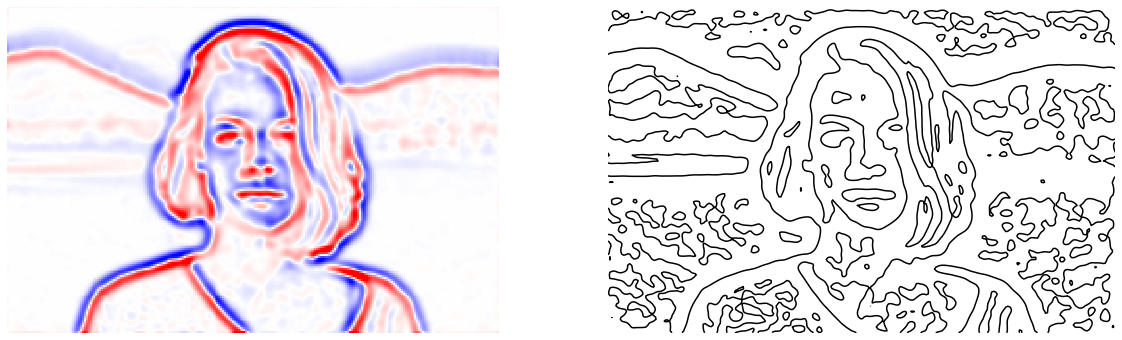

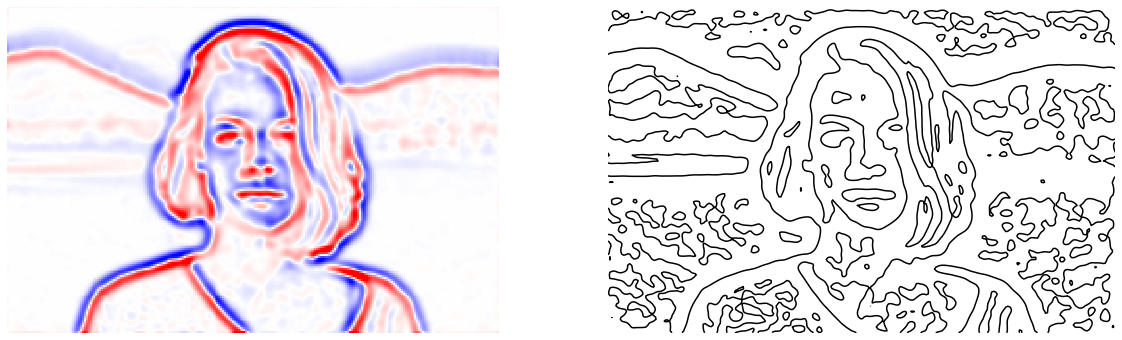

In [21]:
@interact(sigma=(0.1,10,0.1))
def g(sigma=2):

    fig = plt.figure(figsize=(20,6))

    ax = fig.add_subplot(1, 2, 1)
    iml = ndimage.convolve(gaussian(im, sigma=sigma), L4)
    m = np.abs(iml).max() / 2
    imshow(iml, cmap="bwr", vmin=-m, vmax=m) 
    plt.axis('off')

    ax = fig.add_subplot(1, 2, 2)
    plt.contour(iml, levels=[0])
    plt.gca().invert_yaxis()
    plt.axis('off')

    plt.show()
    
g()

## Laplacian-of-GaussianとDifference-of-Gaussian

### LoG

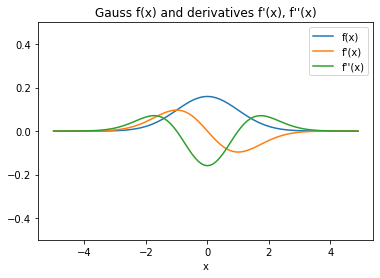

In [27]:
def gauss(x, sigma=1):
    return np.exp(- x**2 / 2 / sigma**2) / 2 / np.pi / sigma

def grad_gauss(x, sigma, n=1):
    return derivative(gauss, x, dx=1e-6, n=n, args=({sigma:sigma})) # n次導関数を計算

@interact(sigma=(0.1, 2, 0.05))
def g(sigma=1):
    
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, gauss(x, sigma=sigma), label="f(x)")
    plt.plot(x, grad_gauss(x, sigma=sigma), label="f'(x)")
    plt.plot(x, grad_gauss(x, sigma=sigma, n=2), label="f''(x)")
    plt.title("Gauss f(x) and derivatives f'(x), f''(x)")
    plt.xlabel("x")
    plt.ylim(-0.5, 0.5)
    plt.legend()
    plt.show()



### DoG

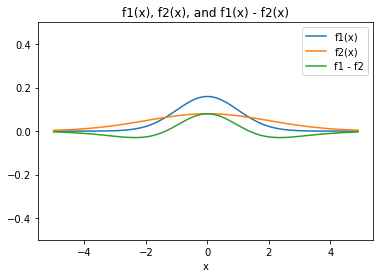

In [28]:

@interact(sigma1=(0.1, 2, 0.05),
         sigma2=(0.1, 2, 0.05))
def g(sigma1=1,sigma2=2):
    
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, gauss(x, sigma=sigma1), label="f1(x)")
    plt.plot(x, gauss(x, sigma=sigma2), label="f2(x)")
    plt.plot(x, gauss(x, sigma=sigma1) - gauss(x, sigma=sigma2), label="f1 - f2")
    plt.title("f1(x), f2(x), and f1(x) - f2(x)")
    plt.xlabel("x")
    plt.ylim(-0.5, 0.5)
    plt.legend()
    plt.show()



## Cannyエッジ

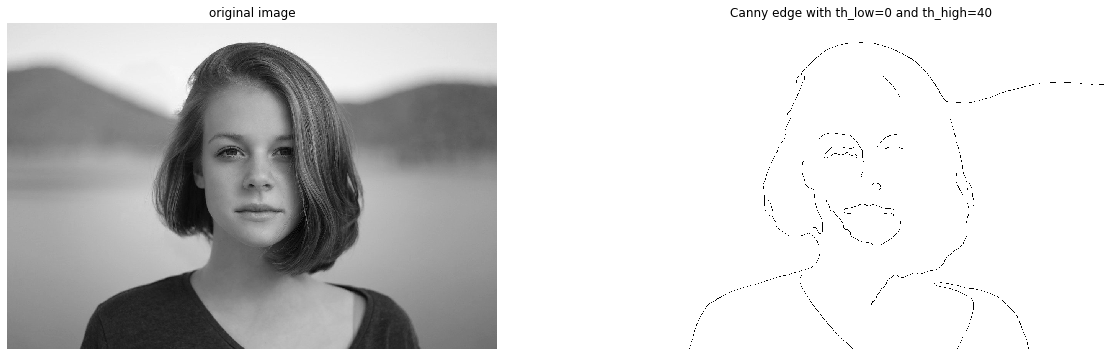

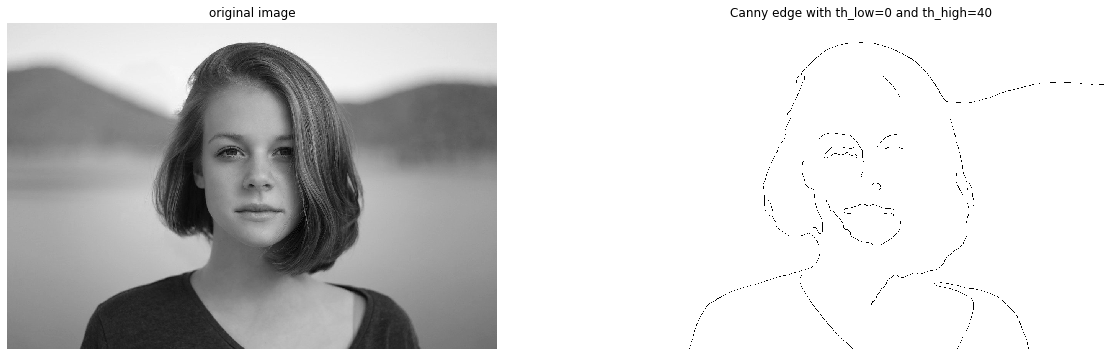

In [24]:
im = rgb2gray(imread('girl.jpg'))

@interact(sigma=(0.1, 10, 0.1),
          th_low=(0, 255, 1),
          th_high=(0, 255, 1)
         )
def g(sigma=5, th_low=0, th_high=40):
    fig = plt.figure(figsize=(20,6))

    fig.add_subplot(1, 2, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')
    
    fig.add_subplot(1, 2, 2)
    im_edge = canny(im, sigma=sigma, 
                    low_threshold=th_low/255, 
                    high_threshold=th_high/255)
    imshow(im_edge, cmap='gray_r')
    plt.axis('off')
    plt.title('Canny edge with th_low={0} and th_high={1}'.format(th_low, th_high))
    
    plt.show()
    
g()

## アンシャープマスキング

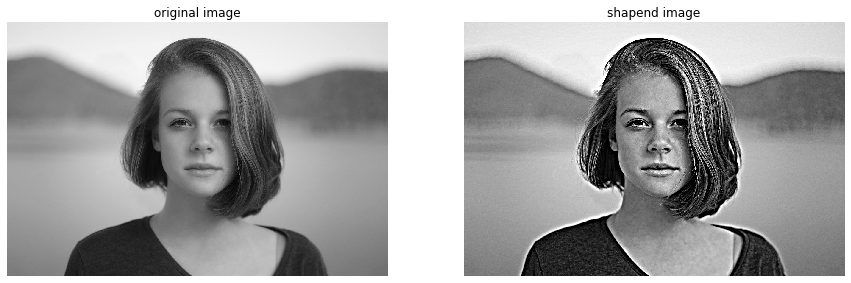

In [25]:
im = rgb2gray(imread('girl.jpg'))

@interact(sigma=(0, 10, 1), k=(1,10,1))
def g(sigma=7, k=3):
    
    fig = plt.figure(figsize=(15, 5))

    im_s = gaussian(im, sigma=sigma)

    img1 = im + (im - im_s) * k
    img1[img1 > 1] = 1
    img1[img1 < 0] = 0

    ax = fig.add_subplot(1, 2, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')
    
    ax = fig.add_subplot(1, 2, 2)
    imshow(img1)
    plt.axis('off')
    plt.title('shapend image')
    
    plt.show()

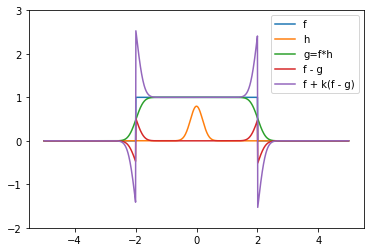

In [26]:
def box(x, th=2):
    return 1 if np.abs(x) < th else 0

def gauss(x, sigma=1):
    return np.exp(- x**2 / 2 / sigma**2) / 2 / np.pi / sigma


@interact(sigma=(0, 2, 0.1), k=(0.1,3,0.1),
         show_f=True, show_h=True, show_g=True, show_fg=True, show_result=True )
def g(sigma=0.2, k=3, show_f=True, show_h=True, show_g=True, show_fg=True, show_result=True):
    
    x = np.arange(-5, 5, 0.01)
    f = np.array([box(i) for i in x])
    h = gauss(x, sigma=sigma)

    if show_f: plt.plot(x, f, label="f")
    if show_h: plt.plot(x, h, label="h")
    g = signal.convolve(f, h, mode='same') / sum(h)
    if show_g: plt.plot(x, g, label='g=f*h')
    if show_fg: plt.plot(x, f - g, label='f - g')
    if show_result: plt.plot(x, f + k * (f - g), label='f + k(f - g)')
    plt.ylim(-2, 3)
    plt.legend()
    plt.show()

## 非線形フィルタ:メディアンフィルタ

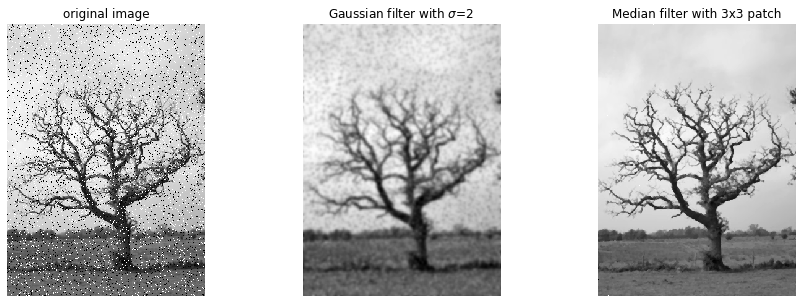

In [29]:
im = imread('salt_and_pepper.png')

@interact(sigma=(0, 10, 1), N=(1, 10, 1))
def g(sigma=2, N=3):

    fig = plt.figure(figsize=(15, 5))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')


    ax = fig.add_subplot(1, 3, 2)
    imshow(gaussian(im, sigma=sigma))
    plt.axis('off')
    plt.title('Gaussian filter with $\sigma$={}'.format(sigma))

    ax = fig.add_subplot(1, 3, 3)
    imshow(median(im, square(N)))
    plt.axis('off')
    plt.title('Median filter with {0}x{0} patch'.format(N))



    plt.show()

## 非線形フィルタ：バイラテラルフィルタ

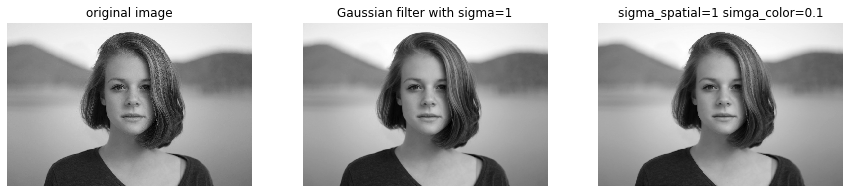

In [30]:
im = rgb2gray(imread('girl.jpg'))

@interact(sigma_spatial=(0, 15, 1), sigma_color=(0, 0.5, 0.1))
def g(sigma_spatial=1, sigma_color=0.1):
    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)

    imshow(im)
    plt.axis('off')
    plt.title('original image')

    ax = fig.add_subplot(1, 3, 2)
    imshow(gaussian(im, sigma=sigma_spatial))
    plt.axis('off')
    plt.title('Gaussian filter with sigma={}'.format(sigma_spatial))
  
    ax = fig.add_subplot(1, 3, 3)
    im_denoise = denoise_bilateral(im,
                                   sigma_spatial=sigma_spatial, 
                                   sigma_color=sigma_color)
    imshow(im_denoise)
    plt.axis('off')
    plt.title('sigma_spatial={0} simga_color={1}'.format(sigma_spatial, sigma_color))

    plt.show()

## 非線形フィルタ：ノンローカルミーンフィルタ

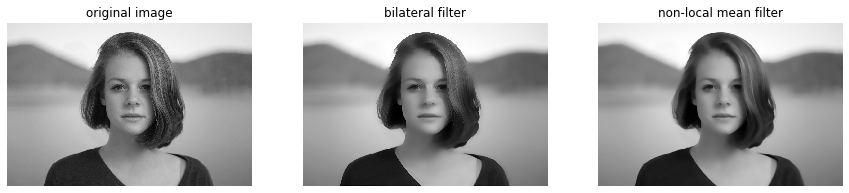

In [32]:
im = rgb2gray(imread('girl.jpg'))

fig = plt.figure(figsize=(15, 3))

ax = fig.add_subplot(1, 3, 1)

imshow(im)
plt.axis('off')
plt.title('original image')

ax = fig.add_subplot(1, 3, 2)
im_denoise = denoise_bilateral(im, sigma_spatial=5, sigma_color=0.1)
imshow(im_denoise)
plt.axis('off')
plt.title('bilateral filter')

ax = fig.add_subplot(1, 3, 3)
im_denoise = denoise_nl_means(im, patch_size=7, patch_distance=11)
imshow(im_denoise)
plt.axis('off')
plt.title('non-local mean filter')

plt.show()

## 音声データのフーリエ変換

In [33]:
def wavread(file, dtype=np.int16):
    chunk_size = 1024 * 8

    with wave.open(file, 'rb') as f:
        nchannels = f.getnchannels()
        audio_data = []
        while True:
            chunk = f.readframes(chunk_size)
            audio_data.append(chunk)
            if chunk == b'': break

    audio_data = b''.join(audio_data)
    audio_data = np.frombuffer(audio_data, dtype=dtype)
    audio_data = audio_data.reshape((-1, nchannels)).transpose()

    return audio_data

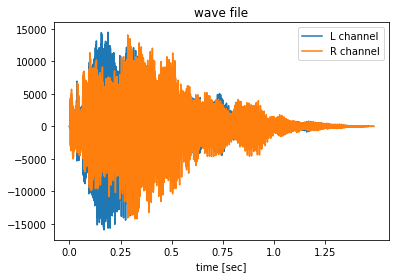

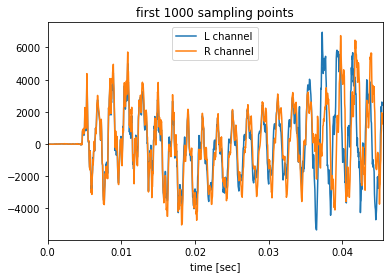

In [34]:
audio_data = wavread('start.wav') # 22kHz, 2 channels stereo, 16 bits/sample
sr = 22000 # sampling rate

plt.plot(audio_data[0], label='L channel')
plt.plot(audio_data[1], label='R channel')
plt.title('wave file')
plt.xlabel('time [sec]')
plt.legend()
idx = np.arange(0, audio_data.shape[1], sr * 0.25) # 1/22000 sec per sample, tick every 0.25 sec
plt.xticks(idx, idx / sr)
plt.show()


plt.plot(audio_data[0, :1000], label='L channel')
plt.plot(audio_data[1, :1000], label='R channel')
plt.title('first 1000 sampling points')
plt.xlabel('time [sec]')
plt.legend()
idx = np.arange(0, audio_data.shape[1], sr * 0.01) # 1/22000 sec per sample, tick every 0.01 sec
plt.xticks(idx, idx / sr)
plt.xlim(0, 1000)
plt.show()

In [35]:
power_spec = np.abs(fft(audio_data[0])) # FFT power spectrum (absolute value of complex spectrum)
db_power_spec = np.log10(power_spec) * 20 # in dB

In [36]:
fps = sr / len(db_power_spec) # frequency per sample
tick_idx = np.arange(0, len(db_power_spec), 2000 / fps) # tick every 2000 Hz
tick_label = np.ceil(tick_idx * fps / 1000).astype(int) # in kHz

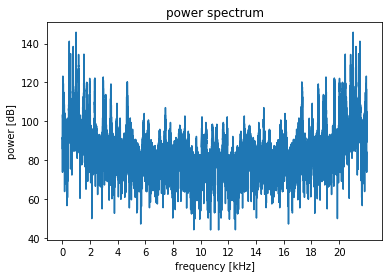

In [37]:
plt.plot(db_power_spec)
plt.title('power spectrum')
plt.xlabel('frequency [kHz]')
plt.ylabel('power [dB]')
plt.xticks(tick_idx, tick_label)
plt.show()

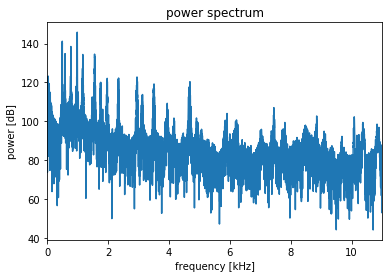

In [38]:
plt.plot(db_power_spec[:len(db_power_spec)//2])
plt.title('power spectrum')
plt.xlabel('frequency [kHz]')
plt.ylabel('power [dB]')
plt.xticks(tick_idx, tick_label)
plt.xlim(0, len(db_power_spec)//2)
plt.show()

## 短時間フーリエ変換によるスペクトログラムの表示

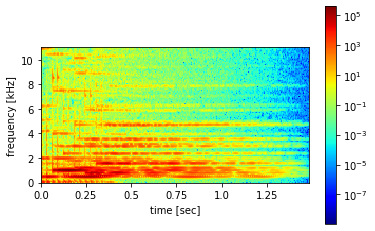

In [39]:
sr = 22000 # sampling rate

B, F, T = mlab.specgram(audio_data[0], # left channel
                        Fs=sr)

imshow(B,
       norm=colors.LogNorm(),
       cmap='jet')


def find_closest_val(T, t):
    X = np.abs(T - t)
    idx = np.where(X == X.min())
    return idx[0][0]

yticks = np.arange(0, 11, 2) # 0, 2, 4, ..., 11 kHz for x-axis
yidx = [find_closest_val(F/1000, f) for f in yticks]

xticks = np.arange(0, 1.4, 0.25) # 0, 0.25, 0.5, ..., 1.25 sec for y-axis
xidx = [find_closest_val(T, t) for t in xticks]

plt.yticks(yidx, yticks)
plt.xticks(xidx, xticks)

plt.xlabel('time [sec]')
plt.ylabel('frequency [kHz]')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## 画像の二次元フーリエ変換

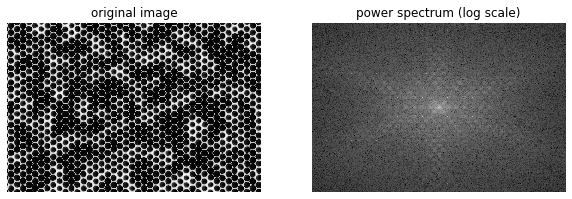

In [40]:
im = rgb2gray(imread('honeycomb.jpg'))

@interact(angle=(0, 360, 5))
def g(angle=0):

    fig = plt.figure(figsize=(10,5))
    
    fig.add_subplot(1, 2, 1)
    im_rot = rotate(im, angle=angle, preserve_range=True)
    imshow(im_rot)
    plt.axis('off')
    plt.title('original image')

    fig.add_subplot(1, 2, 2)
    im_freq = np.fft.fft2(im_rot)
    h, w = im_freq.shape
#     im_freq = np.roll(im_freq, h//2, 0)
#     im_freq = np.roll(im_freq, w//2, 1)
    im_freq = np.fft.fftshift(im_freq)
    imshow(np.log10(np.abs(im_freq)) * 20, vmin=0)
    plt.axis('off')
    plt.title('power spectrum (log scale)')


    plt.show()

In [41]:
im = rgb2gray(imread('girl.jpg'))

time_ndconv = []
time_sigconv = []
time_sigconvfft = []
time_fftconv = []

N_range = range(3, 31, 2)

for N in N_range:
    w = np.ones((N, N)) / (N ** 2)  # N×N平均値フィルタ
    print(w.shape)

    st = time()
    ndimage.convolve(im, w)
    time_ndconv.append(time() - st)

    if N < 15:
        st = time()
        signal.convolve(im, w, method='direct', mode='same')
        time_sigconv.append(time() - st)
    
    st = time()
    signal.convolve(im, w, method='fft', mode='same')
    time_sigconvfft.append(time() - st)
    
    st = time()
    signal.fftconvolve(im, w, mode='same')
    time_fftconv.append(time() - st)

(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
(15, 15)
(17, 17)
(19, 19)
(21, 21)
(23, 23)
(25, 25)
(27, 27)
(29, 29)


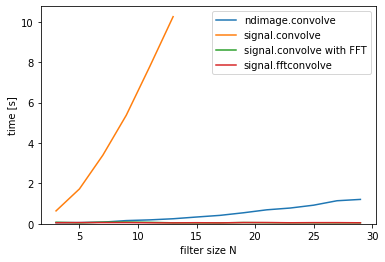

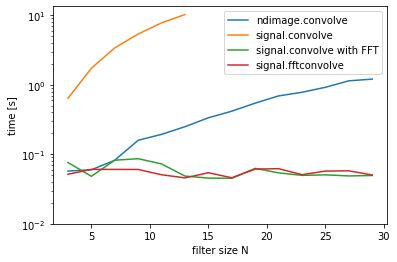

In [42]:
for yscale,ymin in [('linear', 0), ('log', 0.01)]:
    plt.plot(N_range, time_ndconv, label='ndimage.convolve')
    plt.plot(N_range[:len(time_sigconv)], time_sigconv, label='signal.convolve')
    plt.plot(N_range, time_sigconvfft, label='signal.convolve with FFT')
    plt.plot(N_range, time_fftconv, label='signal.fftconvolve')
    plt.legend()
    plt.ylabel('time [s]')
    plt.xlabel('filter size N')
    plt.yscale(yscale)
    plt.ylim(ymin)
    plt.show()

## ローパスフィルタ

### 円形ボックスフィルタ

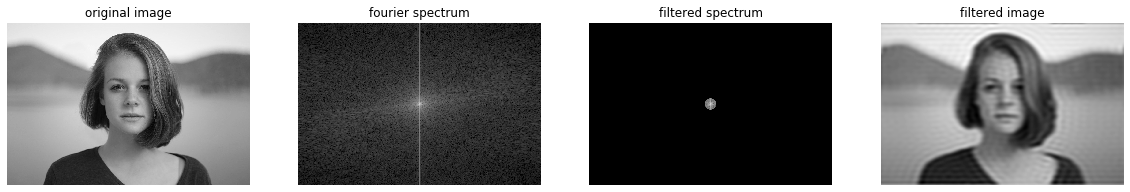

In [43]:
im = rgb2gray(imread('girl.jpg'))

@interact(radius=(0, 200, 5))
def g(radius=30):

    fig = plt.figure(figsize=(20,5))

    fig.add_subplot(1, 4, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')

    fig.add_subplot(1, 4, 2)
    im_freq = np.fft.fft2(im)
    h, w = im_freq.shape
#     im_freq = np.roll(im_freq, h//2, 0)
#     im_freq = np.roll(im_freq, w//2, 1)
    im_freq = np.fft.fftshift(im_freq)
    imshow(np.log10(np.abs(im_freq)) * 20, vmin=0)
    plt.axis('off')
    plt.title('fourier spectrum')

    im_freq2 = im_freq.copy()
    im_freq2 *= 0.0001
    rr, cc = skimage.draw.circle(h//2, w//2, radius)
    im_freq2[rr, cc] = im_freq[rr, cc]
    fig.add_subplot(1, 4, 3)
    imshow(np.log10(np.abs(im_freq2)) * 20, vmin=0)
    plt.axis('off')
    plt.title('filtered spectrum')
    
    fig.add_subplot(1, 4, 4)
#     im_freq2 = np.roll(im_freq2, h//2, 0)
#     im_freq2 = np.roll(im_freq2, w//2, 1)
    im_freq2 = np.fft.fftshift(im_freq2)
    g = np.fft.ifft2(im_freq2)
    imshow(np.abs(g))
    plt.axis('off')
    plt.title('filtered image')

    plt.show()

### ガウス型ローパスフィルタ

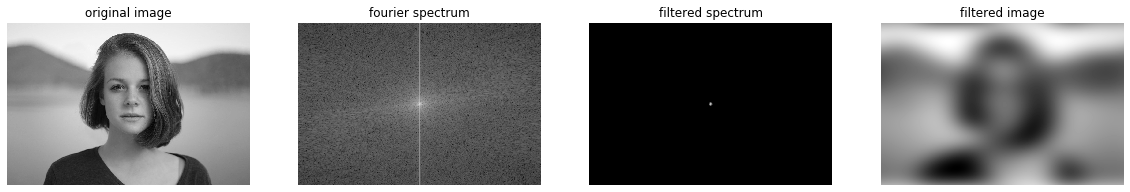

In [44]:
im = rgb2gray(imread('girl.jpg'))

impulse = np.ones(im.shape) * np.finfo(np.float32).eps # avoid 0-division in log
h, w = im.shape
impulse[h//2, w//2] = 1

@interact(sigma=(1, 50, 5))
def g(sigma=3):

    fig = plt.figure(figsize=(20,5))

    fig.add_subplot(1, 4, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')

    fig.add_subplot(1, 4, 2)
    im_freq = np.fft.fft2(im)
    h, w = im_freq.shape
#     im_freq = np.roll(im_freq, h//2, 0)
#     im_freq = np.roll(im_freq, w//2, 1)
    im_freq = np.fft.fftshift(im_freq)
    imshow(np.log10(np.abs(im_freq) * 20), vmin=0)
    plt.axis('off')
    plt.title('fourier spectrum')

    im_freq2 = im_freq.copy()
    im_freq2 *= gaussian(impulse, sigma=sigma)
    fig.add_subplot(1, 4, 3)
    imshow(np.log10(np.abs(im_freq2) * 20), vmin=0)
    plt.axis('off')
    plt.title('filtered spectrum')

    fig.add_subplot(1, 4, 4)
#     im_freq2 = np.roll(im_freq2, h//2, 0)
#     im_freq2 = np.roll(im_freq2, w//2, 1)
    im_freq2 = np.fft.fftshift(im_freq2)
    g = np.fft.ifft2(im_freq2)
    imshow(np.abs(g))
    plt.axis('off')
    plt.title('filtered image')

    plt.show()

## ハイパスフィルタ

Highpassfilter

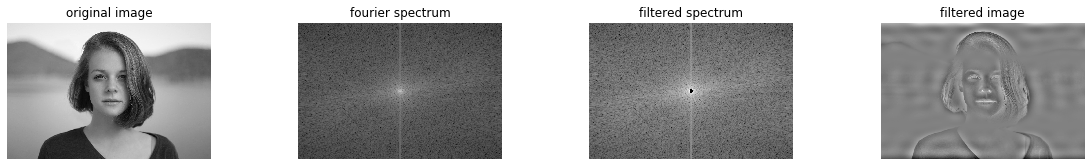

In [45]:
im = rgb2gray(imread('girl.jpg'))

@interact(radius=(0, 20, 1))
def g(radius=10):

    fig = plt.figure(figsize=(20, 2.5))

    fig.add_subplot(1, 4, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')
    
    im_freq = np.fft.fft2(im)

    h, w = im_freq.shape
#     im_freq = np.roll(im_freq, h//2, 0)
#     im_freq = np.roll(im_freq, w//2, 1)
    im_freq = np.fft.fftshift(im_freq)
    fig.add_subplot(1, 4, 2)
    imshow(np.log10(np.abs(im_freq) * 20), vmin=0)
    plt.axis('off')
    plt.title('fourier spectrum')



    im_freq2 = im_freq.copy()
    rr, cc = skimage.draw.circle(h//2, w//2, radius)
    im_freq2[rr, cc] = 0.0001
    fig.add_subplot(1, 4, 3)
    imshow(np.log10(np.abs(im_freq2) * 20), vmin=0)
    plt.axis('off')
    plt.title('filtered spectrum')
    
    
    fig.add_subplot(1, 4, 4)
#     im_freq2 = np.roll(im_freq2, h//2, 0)
#     im_freq2 = np.roll(im_freq2, w//2, 1)
    im_freq2 = np.fft.fftshift(im_freq2)
    g = np.fft.ifft2(im_freq2)
    # imshow(np.abs(g))
    imshow(g.real)
    plt.axis('off')
    plt.title('filtered image')

    plt.show()

### ガウス型ハイパスフィルタ


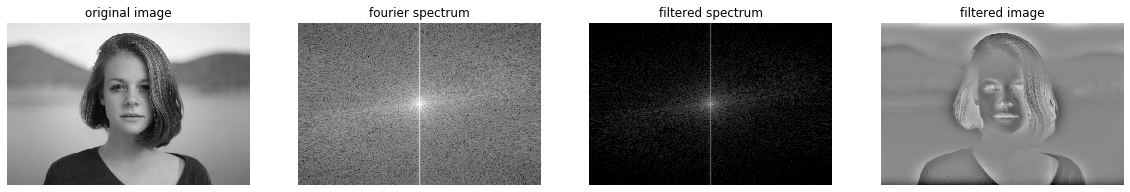

In [47]:
im = rgb2gray(imread('girl.jpg'))

impulse = np.ones(im.shape) * np.finfo(np.float32).eps # avoid 0-division in log
h, w = im.shape
impulse[h//2, w//2] = 1

@interact(sigma=(1, 20, 1))
def g(sigma=5):

    fig = plt.figure(figsize=(20,5))

    fig.add_subplot(1, 4, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')

    fig.add_subplot(1, 4, 2)
    im_freq = np.fft.fft2(im)
    h, w = im_freq.shape
#     im_freq = np.roll(im_freq, h//2, 0)
#     im_freq = np.roll(im_freq, w//2, 1)
    im_freq = np.fft.fftshift(im_freq)
    imshow(np.log10(np.abs(im_freq) * 20), vmin=0, vmax=5)
    plt.axis('off')
    plt.title('fourier spectrum')

    im_freq2 = im_freq.copy()
    gauss = gaussian(impulse, sigma=sigma)
    im_freq2 *= (gauss.max()*1.01 - gauss)
    fig.add_subplot(1, 4, 3)
    imshow(np.log10(np.abs(im_freq2) * 20), vmin=0, vmax=5)
    plt.axis('off')
    plt.title('filtered spectrum')

    fig.add_subplot(1, 4, 4)
#     im_freq2 = np.roll(im_freq2, h//2, 0)
#     im_freq2 = np.roll(im_freq2, w//2, 1)
    im_freq2 = np.fft.fftshift(im_freq2)
    g = np.fft.ifft2(im_freq2)
#     imshow(np.abs(g))
    imshow(g.real)
    plt.axis('off')
    plt.title('filtered image')

    plt.show()

### バンドパスフィルタ

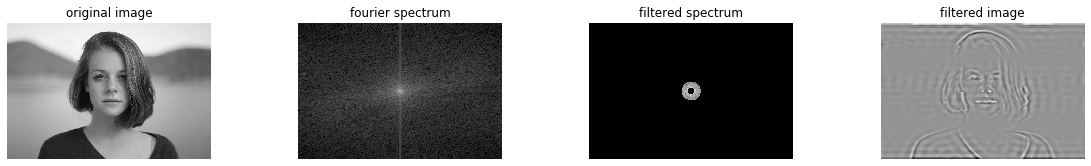

In [48]:
im = rgb2gray(imread('girl.jpg'))

val_range = (0, 200, 10)
@interact(radius1=val_range, 
          radius2=val_range)
def g(radius1=60, radius2=20):

    fig = plt.figure(figsize=(20, 2.5))

    fig.add_subplot(1, 4, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')


    fig.add_subplot(1, 4, 2)
    im_freq = np.fft.fft2(im)
    h, w = im_freq.shape
#     im_freq = np.roll(im_freq, h//2, 0)
#     im_freq = np.roll(im_freq, w//2, 1)
    im_freq = np.fft.fftshift(im_freq)
    imshow(np.log10(np.abs(im_freq)) * 20, vmin=0)
    plt.axis('off')
    plt.title('fourier spectrum')



    fig.add_subplot(1, 4, 3)
    im_freq2 = im_freq.copy()
    im_freq2 *= 0.0001
    rr, cc = skimage.draw.circle(h//2, w//2, radius1)
    im_freq2[rr, cc] = im_freq[rr, cc]
    rr, cc = skimage.draw.circle(h//2, w//2, radius2)
    im_freq2[rr, cc] = 0.0001        
    imshow(np.log10(np.abs(im_freq2)) * 20, vmin=0)
    plt.axis('off')
    plt.title('filtered spectrum')


    fig.add_subplot(1, 4, 4)
#     im_freq2 = np.roll(im_freq2, h//2, 0)
#     im_freq2 = np.roll(im_freq2, w//2, 1)
    im_freq2 = np.fft.fftshift(im_freq2)
    g = np.fft.ifft2(im_freq2)
#     imshow(np.abs(g))
    imshow(g.real)
    plt.axis('off')
    plt.title('filtered image')

    plt.show()